In [2]:
import pandas as pd
data = {
    'Age':[22, 25, 27, 35, 45, 52, 23, 26, 48, 55],
    'Salary':[25000, 27000, 30000, 50000, 70000, 90000, 26000, 28000, 75000, 95000],
    'SpendingScore':[40, 60, 65, 30, 20, 10, 55, 70, 25, 15]
}
df = pd.DataFrame(data)
print("Customer Dataset:\n", df)


Customer Dataset:
    Age  Salary  SpendingScore
0   22   25000             40
1   25   27000             60
2   27   30000             65
3   35   50000             30
4   45   70000             20
5   52   90000             10
6   23   26000             55
7   26   28000             70
8   48   75000             25
9   55   95000             15


In [3]:
from sklearn.cluster import KMeans
X = df[['Age', 'Salary', 'SpendingScore']]
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_
print("Dataset with Cluster Labels:\n", df)

Dataset with Cluster Labels:
    Age  Salary  SpendingScore  Cluster
0   22   25000             40        0
1   25   27000             60        0
2   27   30000             65        0
3   35   50000             30        0
4   45   70000             20        1
5   52   90000             10        1
6   23   26000             55        0
7   26   28000             70        0
8   48   75000             25        1
9   55   95000             15        1


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]
print("Dataset with PCA Components:\n", df)

Dataset with PCA Components:
    Age  Salary  SpendingScore  Cluster           PC1        PC2
0   22   25000             40        0 -26599.997716 -17.683937
1   25   27000             60        0 -24600.011039   3.807625
2   27   30000             65        0 -21600.014672  10.933131
3   35   50000             30        0  -1599.993510 -10.101061
4   45   70000             20        1  18400.011071  -6.057235
5   52   90000             10        1  38400.014287  -2.216323
6   23   26000             55        0 -25600.008103  -1.983427
7   26   28000             70        0 -23600.017928  14.519588
8   48   75000             25        1  23400.007197   2.470363
9   55   95000             15        1  43400.010413   6.311275


In [5]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
sil_score = silhouette_score(X, df['Cluster'])
sil_values = silhouette_samples(X, df['Cluster'])
df['Silhouette'] = sil_values
print(f"Average Silhouette Score: {sil_score:.3f}")
print("\nSilhouette values per point:\n", df[['Cluster','Silhouette']])

Average Silhouette Score: 0.750

Silhouette values per point:
    Cluster  Silhouette
0        0    0.874781
1        0    0.891891
2        0    0.870476
3        0    0.298461
4        1    0.572650
5        1    0.774011
6        0    0.886725
7        0    0.889907
8        1    0.696970
9        1    0.739583


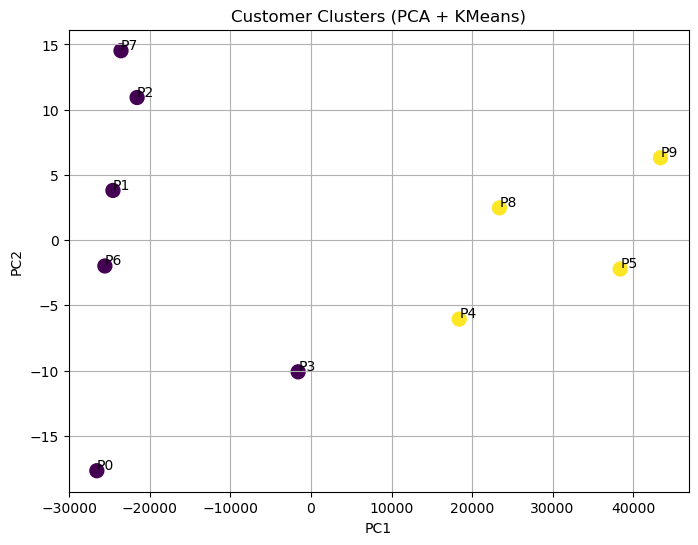

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(df['PC1'], df['PC2'], c=df['Cluster'], cmap='viridis', s=100)
for i, (x, y) in enumerate(zip(df['PC1'], df['PC2'])):
    plt.text(x + 0.1, y + 0.1, f"P{i}")
plt.title('Customer Clusters (PCA + KMeans)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


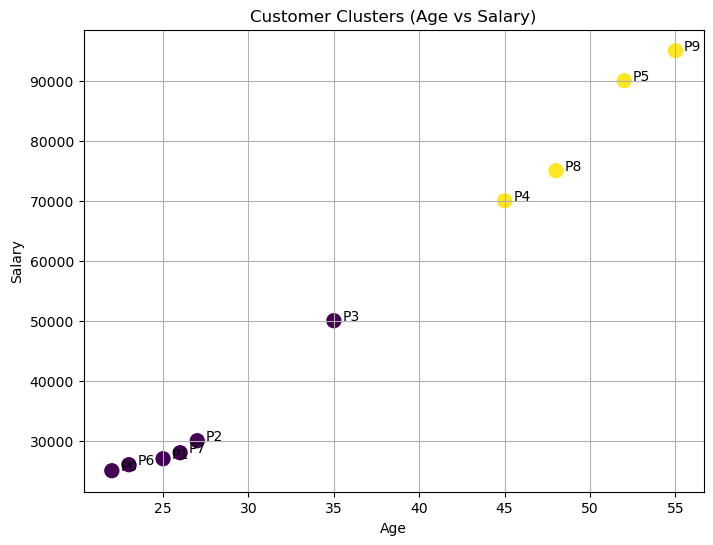

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Salary'], c=df['Cluster'], cmap='viridis', s=100)
for i, (age, salary) in enumerate(zip(df['Age'], df['Salary'])):
    plt.text(age + 0.5, salary, f"P{i}")
plt.title('Customer Clusters (Age vs Salary)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


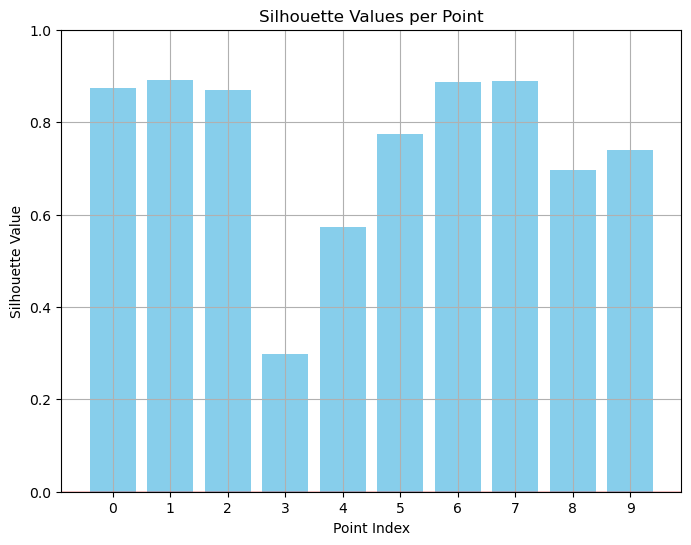

In [8]:
plt.figure(figsize=(8,6))
plt.bar(range(len(sil_values)), sil_values, color='skyblue')
plt.axhline(y=0, color='red', linewidth=1)
plt.title('Silhouette Values per Point')
plt.xlabel('Point Index')
plt.ylabel('Silhouette Value')
plt.xticks(range(len(sil_values))) 
plt.ylim(0, 1)                       
plt.grid(True)
plt.show()


In [9]:
kmeans = KMeans(n_clusters = 2, random_state = 42).fit(X)
df['Cluster'] = kmeans.labels_
for c in df['Cluster'].unique():
    print(f"\nCluster {c} Summary:")
    print(df[df['Cluster'] == c][['Age','Salary','SpendingScore']].describe())



Cluster 0 Summary:
             Age        Salary  SpendingScore
count   6.000000      6.000000       6.000000
mean   26.333333  31000.000000      53.333333
std     4.633213   9465.727653      15.383974
min    22.000000  25000.000000      30.000000
25%    23.500000  26250.000000      43.750000
50%    25.500000  27500.000000      57.500000
75%    26.750000  29500.000000      63.750000
max    35.000000  50000.000000      70.000000

Cluster 1 Summary:
             Age        Salary  SpendingScore
count   4.000000      4.000000       4.000000
mean   50.000000  82500.000000      17.500000
std     4.396969  11902.380714       6.454972
min    45.000000  70000.000000      10.000000
25%    47.250000  73750.000000      13.750000
50%    50.000000  82500.000000      17.500000
75%    52.750000  91250.000000      21.250000
max    55.000000  95000.000000      25.000000
